In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取 Michigan.csv 数据
df = pd.read_csv('/home/suruixian/Documents/Graduation_Thesis/data/2021 preprocessed data/Michigan.csv')

# 显示数据的基本信息
print("数据集基本信息：")
print(df.info())

数据集基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108000 entries, 0 to 107999
Data columns (total 69 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   DATE                              108000 non-null  object 
 1   TIME                              108000 non-null  int64  
 2   MICHIGAN CLG PLANTDIST CHW FLOW   108000 non-null  float64
 3   MICHIGAN CLG PLANTDIST CHWR TEMP  108000 non-null  float64
 4   MICHIGAN CLG PLANTDIST CHWS TEMP  108000 non-null  float64
 5   MICHIGAN AH1 DA TEMP              93901 non-null   float64
 6   MICHIGAN AH1 MA TEMP              93901 non-null   float64
 7   MICHIGAN AH1 CLG TEMP             93901 non-null   float64
 8   MICHIGAN AH1 RA HUM               93901 non-null   float64
 9   MICHIGAN AH1 RA TEMP              93901 non-null   float64
 10  MICHIGAN AH1 RF CFM               93906 non-null   float64
 11  MICHIGAN AH1 RM1 TEMP             93906 non

In [3]:
# 将DATE和TIME列转换为datetime格式
df['DATE'] = pd.to_datetime(df['DATE'])
df['datetime'] = df.apply(lambda x: x['DATE'] + pd.Timedelta(minutes=int(x['TIME'])), axis=1)

# 设置datetime为索引
df.set_index('datetime', inplace=True)

# 按小时重采样数据，使用平均值作为聚合方法
hourly_df = df.resample('h').mean()

# 删除不需要的列
hourly_df = hourly_df.drop(['TIME'], axis=1)

# 显示处理后的数据信息
print("小时级别数据集基本信息：")
print(hourly_df.info())

# 显示前几行数据
print("\n小时级别数据前5行：")
print(hourly_df.head())

小时级别数据集基本信息：
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1800 entries, 2021-07-19 00:00:00 to 2021-10-01 23:00:00
Freq: h
Data columns (total 68 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   DATE                              1800 non-null   datetime64[ns]
 1   MICHIGAN CLG PLANTDIST CHW FLOW   1800 non-null   float64       
 2   MICHIGAN CLG PLANTDIST CHWR TEMP  1800 non-null   float64       
 3   MICHIGAN CLG PLANTDIST CHWS TEMP  1800 non-null   float64       
 4   MICHIGAN AH1 DA TEMP              1566 non-null   float64       
 5   MICHIGAN AH1 MA TEMP              1566 non-null   float64       
 6   MICHIGAN AH1 CLG TEMP             1566 non-null   float64       
 7   MICHIGAN AH1 RA HUM               1566 non-null   float64       
 8   MICHIGAN AH1 RA TEMP              1566 non-null   float64       
 9   MICHIGAN AH1 RF CFM               1566 non-null   float64    

In [4]:
hourly_df.head()

,DATE,MICHIGAN CLG PLANTDIST CHW FLOW,MICHIGAN CLG PLANTDIST CHWR TEMP,MICHIGAN CLG PLANTDIST CHWS TEMP,MICHIGAN AH1 DA TEMP,MICHIGAN AH1 MA TEMP,MICHIGAN AH1 CLG TEMP,MICHIGAN AH1 RA HUM,MICHIGAN AH1 RA TEMP,MICHIGAN AH1 RF CFM,...,MICHIGAN AH4 RET CFM,FAN TOT POW,AH1 RF POW,AH2 RF POW,AH3 RF POW,AH4 RF POW,AH1 SF POW,AH2 SF POW,AH3 SF POW,AH4 SF POW
datetime,,,,,,,,,,,,,,,,,,,,,
2021-07-19 00:00:00,2021-07-19,6620.166667,49.273333,42.210333,74.215667,79.345500,75.670000,48.362833,80.631500,6.01,...,10.18,2713.140882,92.479325,97.475994,319.224324,130.438989,139.473163,177.785575,1403.309839,352.953671
2021-07-19 01:00:00,2021-07-19,6603.566667,49.021667,42.186500,74.393167,79.259500,76.083500,48.133500,80.661000,6.01,...,10.18,2656.179632,92.479325,97.475994,318.601788,131.962564,141.586274,179.544973,1342.058452,352.470263
2021-07-19 02:00:00,2021-07-19,6521.866667,48.885000,42.107333,74.501667,79.291167,76.468833,48.780833,80.554833,6.01,...,10.18,2654.881827,92.606290,97.475994,321.721293,131.223985,141.262692,179.061564,1336.581133,354.948877
2021-07-19 03:00:00,2021-07-19,6435.566667,48.633333,41.990667,74.603667,79.081333,76.705667,49.039667,80.418000,6.01,...,10.18,2619.942504,92.690933,96.288261,317.222926,129.133849,136.887124,175.584691,1323.137399,348.997320
2021-07-19 04:00:00,2021-07-19,6360.216667,48.390000,41.880667,74.719667,79.026500,76.897000,48.767333,80.286667,6.01,...,10.18,2601.564544,92.479325,96.124436,319.894642,129.352282,137.466167,175.743208,1300.553448,349.951036


<class 'pandas.core.series.Series'>
DatetimeIndex: 1800 entries, 2021-07-19 00:00:00 to 2021-10-01 23:00:00
Freq: h
Series name: FAN TOT POW
Non-Null Count  Dtype  
--------------  -----  
1800 non-null   float64
dtypes: float64(1)
memory usage: 28.1 KB
总功率统计信息：
平均功率: 14785.41 kW
最大功率: 44451.41 kW
最小功率: 1356.37 kW
功率标准差: 10496.24 kW

总耗电量: 26613731.25 kWh
平均日耗电量: 354849.75 kWh/天


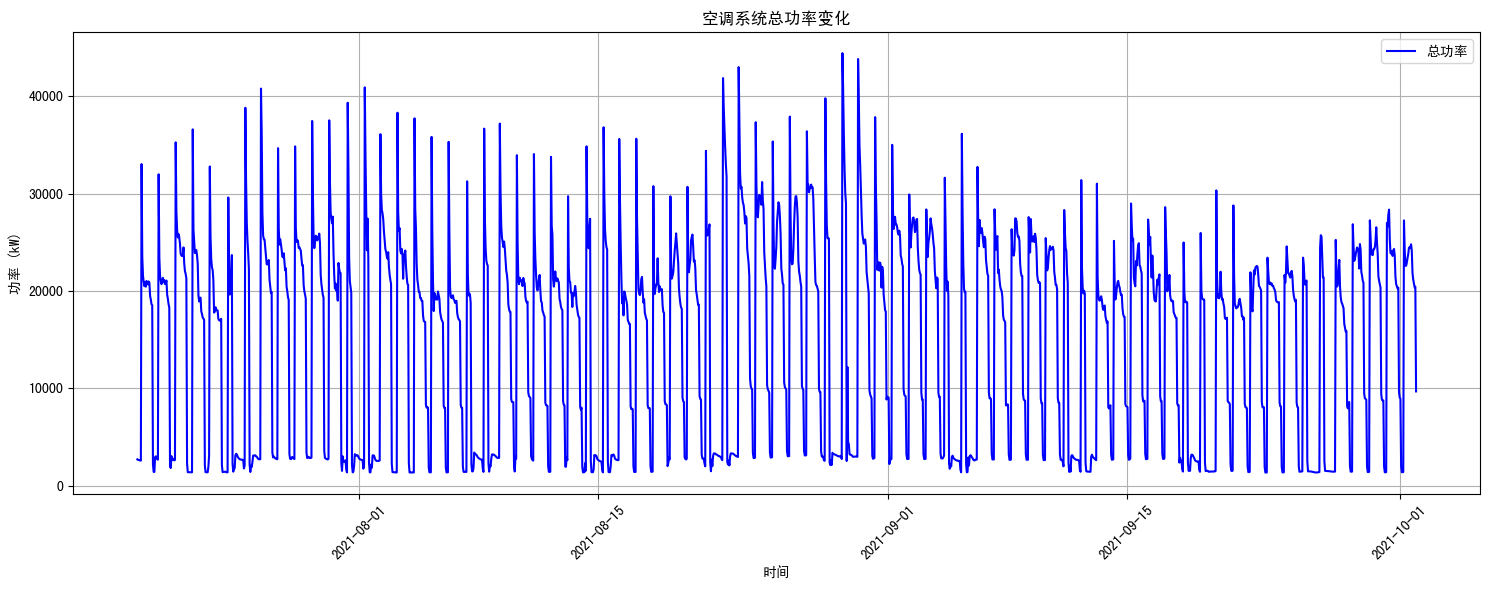

In [5]:
# 获取总功率数据
total_power = hourly_df['FAN TOT POW']
total_power.info()

# 计算关键统计值
print("总功率统计信息：")
print(f"平均功率: {total_power.mean():.2f} kW")
print(f"最大功率: {total_power.max():.2f} kW")
print(f"最小功率: {total_power.min():.2f} kW")
print(f"功率标准差: {total_power.std():.2f} kW")

# 计算总耗电量（千瓦时）
# 由于数据是按小时采样的，所以每个功率值代表一个小时的耗电量
total_energy = total_power.sum()  # 总千瓦时
print(f"\n总耗电量: {total_energy:.2f} kWh")
print(f"平均日耗电量: {total_energy / (len(total_power)/24):.2f} kWh/天")

# 绘制总功率随时间变化的曲线图
plt.figure(figsize=(15, 6))
plt.plot(total_power.index, total_power, 'b-', label='总功率')
plt.title('空调系统总功率变化')
plt.xlabel('时间')
plt.ylabel('功率 (kW)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
# 读取需求响应事件表并过滤掉5分钟斜坡事件
dr_events = pd.read_csv('/home/suruixian/Documents/Graduation_Thesis/data/Michigan/Michigan_Event_Schedule.csv')

# 将日期和时间列转换为datetime格式
dr_events['start_datetime'] = pd.to_datetime(dr_events['Date'] + ' ' + dr_events['Start Time'])
dr_events['end_datetime'] = pd.to_datetime(dr_events['Date'] + ' ' + dr_events['End Time'])

# 过滤掉5分钟斜坡事件
dr_events_filtered = dr_events[dr_events['Notes'].fillna('') != '5-min ramp']

# 将Event ID转换为字符串并筛选2021年的事件
dr_events_filtered['Event ID'] = dr_events_filtered['Event ID'].astype(str)
dr_events_2021 = dr_events_filtered[dr_events_filtered['Event ID'].str.startswith('21')]

print("需求响应事件统计：")
print(f"原始事件总数: {len(dr_events)}")
print(f"过滤后事件总数: {len(dr_events_filtered)}")
print(f"2021年事件总数: {len(dr_events_2021)}")

需求响应事件统计：
原始事件总数: 334
过滤后事件总数: 322
2021年事件总数: 90


/tmp/ipykernel_924717/525211169.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr_events_filtered['Event ID'] = dr_events_filtered['Event ID'].astype(str)


In [7]:
# ... existing code ...
import numpy as np

# 将时间列转换为datetime格式
df['TIME'] = df['TIME'].astype(str).str.zfill(4)
df['hour'] = df['TIME'].str[:2].astype(int)
df['minute'] = df['TIME'].str[2:].astype(int)

# 将DATE列的时间加上小时和分钟
df['datetime'] = df['DATE'] + pd.to_timedelta(df['hour'], unit='h') + pd.to_timedelta(df['minute'], unit='m')
df.set_index('datetime', inplace=True)

# 将功率数据重采样为小时级别
hourly_power = df['FAN TOT POW'].resample('h').mean()

# 创建一个新的DataFrame来存储所有时间点的事件信息
all_times = pd.DataFrame(index=total_power.index)
all_times['power'] = total_power
all_times['event_id'] = None
all_times['event_type'] = None
all_times['up_change'] = None
all_times['down_change'] = None

all_times.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1800 entries, 2021-07-19 00:00:00 to 2021-10-01 23:00:00
Freq: h
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   power        1800 non-null   float64
 1   event_id     0 non-null      object 
 2   event_type   0 non-null      object 
 3   up_change    0 non-null      object 
 4   down_change  0 non-null      object 
dtypes: float64(1), object(4)
memory usage: 84.4+ KB


融合后的数据基本信息：
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1800 entries, 2021-07-19 00:00:00 to 2021-10-01 23:00:00
Freq: h
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   power        1800 non-null   float64
 1   event_id     180 non-null    object 
 2   event_type   180 non-null    object 
 3   up_change    180 non-null    object 
 4   down_change  180 non-null    object 
dtypes: float64(1), object(4)
memory usage: 84.4+ KB
None

事件期间功率统计：
count      180.000000
mean     23149.508487
std       3164.368928
min      17505.801508
25%      20472.574179
50%      22783.203812
75%      25564.228489
max      31209.064601
Name: power, dtype: float64

非事件期间功率统计：
count     1620.000000
mean     13856.061559
std      10614.637503
min       1356.365549
25%       2769.118867
50%      17151.492639
75%      22367.113581
max      44451.414595
Name: power, dtype: float64


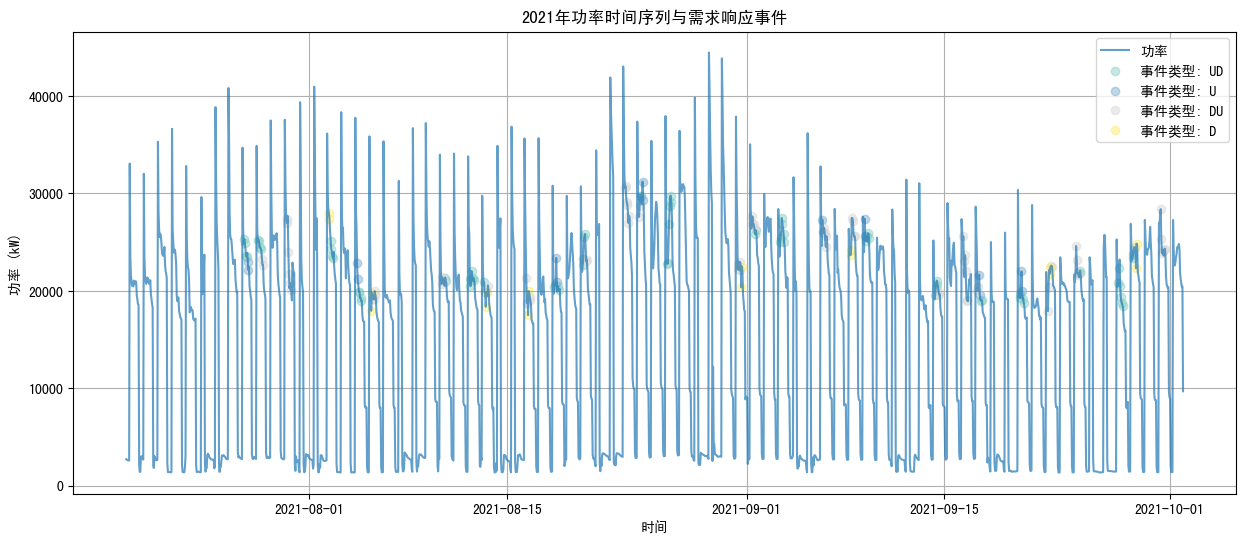

In [8]:

# 将需求响应事件信息添加到时间序列中
for _, event in dr_events_2021.iterrows():
    mask = (all_times.index >= event['start_datetime']) & (all_times.index <= event['end_datetime'])
    all_times.loc[mask, 'event_id'] = event['Event ID']
    all_times.loc[mask, 'event_type'] = event['Type']
    all_times.loc[mask, 'up_change'] = event['Up Change']
    all_times.loc[mask, 'down_change'] = event['Down Change']

# 显示数据基本信息
print("融合后的数据基本信息：")
print(all_times.info())

# 统计事件期间和非事件期间的功率
event_stats = {
    'event_periods': all_times[all_times['event_id'].notna()]['power'].describe(),
    'non_event_periods': all_times[all_times['event_id'].isna()]['power'].describe()
}

print("\n事件期间功率统计：")
print(event_stats['event_periods'])
print("\n非事件期间功率统计：")
print(event_stats['non_event_periods'])

# 绘制功率时间序列，标记事件期间
plt.figure(figsize=(15, 6))
plt.plot(all_times.index, all_times['power'], label='功率', alpha=0.7)

# 用不同颜色标记不同类型的事件
event_types = dr_events_2021['Type'].unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(event_types)))

for event_type, color in zip(event_types, colors):
    event_mask = all_times['event_type'] == event_type
    if event_mask.any():
        plt.scatter(all_times[event_mask].index, 
                   all_times[event_mask]['power'],
                   c=[color], label=f'事件类型: {event_type}',
                   alpha=0.5)

plt.title('2021年功率时间序列与需求响应事件')
plt.xlabel('时间')
plt.ylabel('功率 (kW)')
plt.legend()
plt.grid(True)
plt.show()

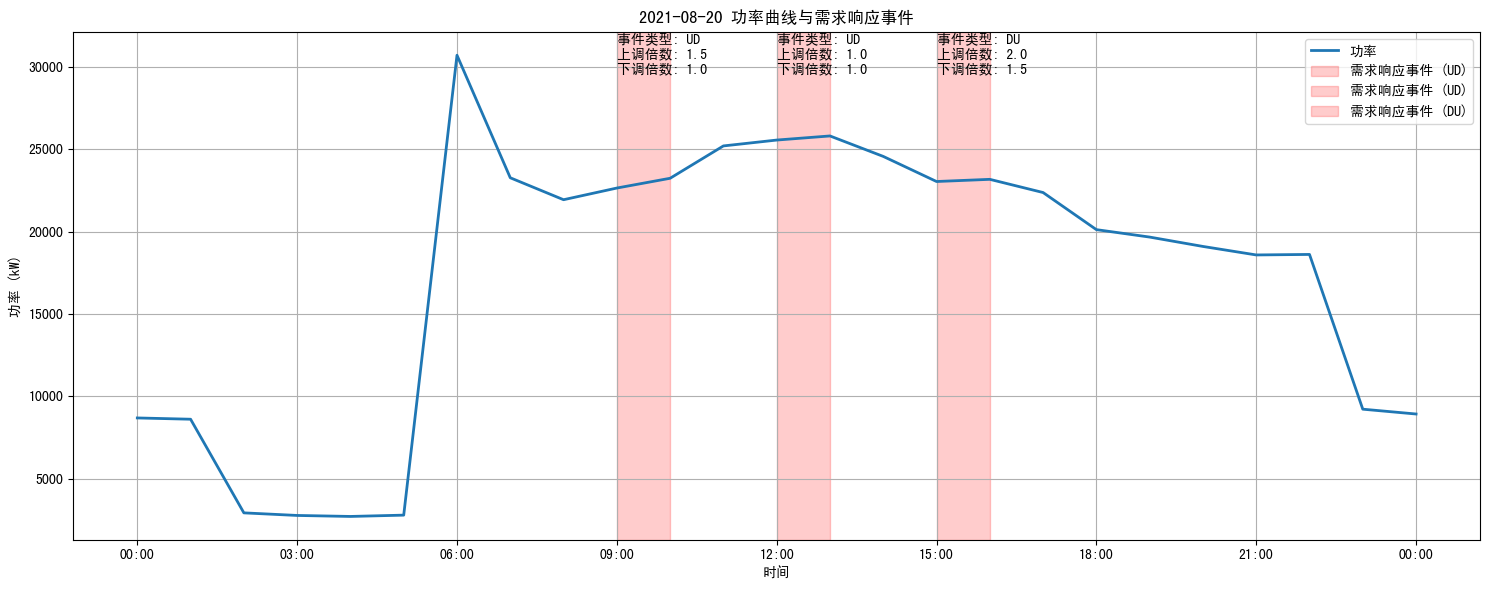


2021-08-20 需求响应事件信息：

事件ID: 2107034
类型: UD
开始时间: 09:00
结束时间: 10:00
上调倍数: 1.5
下调倍数: 1.0
基准功率: 21937.91 kW
事件期间平均功率: 22943.54 kW
功率变化: 1005.63 kW (4.6%)

事件ID: 2107035
类型: UD
开始时间: 12:00
结束时间: 13:00
上调倍数: 1.0
下调倍数: 1.0
基准功率: 25205.25 kW
事件期间平均功率: 25686.29 kW
功率变化: 481.05 kW (1.9%)

事件ID: 2107036
类型: DU
开始时间: 15:00
结束时间: 16:00
上调倍数: 2.0
下调倍数: 1.5
基准功率: 24568.18 kW
事件期间平均功率: 23109.71 kW
功率变化: -1458.47 kW (-5.9%)


In [10]:
# ... existing code ...

def plot_single_day_dr(all_times, dr_events_2021, date='2021-08-15'):
    """绘制指定日期的需求响应功率曲线
    
    Args:
        all_times: 包含功率数据的DataFrame
        dr_events_2021: 需求响应事件数据
        date: 要显示的日期，格式为'YYYY-MM-DD'
    """
    # 获取指定日期的数据
    day_start = pd.Timestamp(date)
    day_end = day_start + pd.Timedelta(days=1)
    
    # 获取当天的功率数据
    day_power = all_times[day_start:day_end]
    
    # 获取当天的需求响应事件
    day_events = dr_events_2021[
        (dr_events_2021['start_datetime'].dt.date == day_start.date())
    ]
    
    # 创建图形
    plt.figure(figsize=(15, 6))
    
    # 绘制功率曲线
    plt.plot(day_power.index, day_power['power'], 
            label='功率', linewidth=2)
    
    # 标记需求响应事件
    for _, event in day_events.iterrows():
        # 用阴影区域标记事件持续时间
        plt.axvspan(event['start_datetime'], event['end_datetime'], 
                   alpha=0.2, color='red', 
                   label=f'需求响应事件 ({event["Type"]})')
        
        # 添加事件信息标注
        plt.text(event['start_datetime'], 
                plt.ylim()[1], 
                f'事件类型: {event["Type"]}\n'
                f'上调倍数: {event["Up Change"]:.1f}\n'
                f'下调倍数: {event["Down Change"]:.1f}',
                verticalalignment='top')
    
    # 设置图形属性
    plt.title(f'{date} 功率曲线与需求响应事件')
    plt.xlabel('时间')
    plt.ylabel('功率 (kW)')
    plt.grid(True)
    plt.legend()
    
    # 设置x轴时间格式
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))
    
    plt.tight_layout()
    plt.show()
    
    # 打印当天事件的详细信息
    if not day_events.empty:
        print(f"\n{date} 需求响应事件信息：")
        for _, event in day_events.iterrows():
            print(f"\n事件ID: {event['Event ID']}")
            print(f"类型: {event['Type']}")
            print(f"开始时间: {event['start_datetime'].strftime('%H:%M')}")
            print(f"结束时间: {event['end_datetime'].strftime('%H:%M')}")
            print(f"上调倍数: {event['Up Change']:.1f}")
            print(f"下调倍数: {event['Down Change']:.1f}")
            
            # 计算事件效果
            event_mask = (all_times.index >= event['start_datetime']) & \
                        (all_times.index <= event['end_datetime'])
            baseline_mask = (all_times.index >= event['start_datetime'] - pd.Timedelta(hours=1)) & \
                          (all_times.index < event['start_datetime'])
            
            event_power = all_times.loc[event_mask, 'power'].mean()
            baseline_power = all_times.loc[baseline_mask, 'power'].mean()
            power_change = event_power - baseline_power
            
            print(f"基准功率: {baseline_power:.2f} kW")
            print(f"事件期间平均功率: {event_power:.2f} kW")
            print(f"功率变化: {power_change:.2f} kW ({power_change/baseline_power*100:.1f}%)")
    else:
        print(f"\n{date} 没有需求响应事件")

# 调用函数显示8月15日的数据
plot_single_day_dr(all_times, dr_events_2021, '2021-08-20')